In [1]:
import numpy as np
import pandas as pd

# Contents:

- Series
- DataFrames
    1. Creating
    2. Editing / Retrieving Data
    3. Conditional Selection
- File Input / Output - Importing Data from Anywhere
- Basics & Math
- Grouping Data
- Concatenate, Merge & Join Data
- Statistics
- Iteration
- Sorting
- Manipulate Data with Functions
- Aligning, Reindexing, Renaming
- MultiIndex
- Cleaning Data
- Real World Examples
- Visualization

# 1. Series

In [2]:
l1 = [1, 2, 3, 4]
labels = ['a', 'b', 'c', 'd']

In [3]:
ser_1 = pd.Series(data=l1, index=labels)
ser_1

a    1
b    2
c    3
d    4
dtype: int64

In [4]:
ar_1 = np.array([1, 2, 3, 4])
ser_2 = pd.Series(ar_1)
dict_1 = {'f_name': 'Derek', 'l_name': 'Banas', 'age': 44}
ser_3 = pd.Series(dict_1)

In [5]:
ser_2

0    1
1    2
2    3
3    4
dtype: int32

In [6]:
ser_3

f_name    Derek
l_name    Banas
age          44
dtype: object

In [7]:
ser_3.f_name

'Derek'

In [8]:
ser_3['f_name']

'Derek'

In [9]:
ser_2.dtype

dtype('int32')

In [10]:
ser_2 / ser_2

0    1.0
1    1.0
2    1.0
3    1.0
dtype: float64

In [11]:
np.exp(ser_2)

0     2.718282
1     7.389056
2    20.085537
3    54.598150
dtype: float64

In [12]:
ser_4 = pd.Series({4:5, 5:6, 6:7, 7:8})
ser_4

4    5
5    6
6    7
7    8
dtype: int64

In [13]:
ser_2 + ser_4  # operations allign by labels

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
dtype: float64

In [14]:
ser_4 = pd.Series({4:5, 5:6, 6:7, 7:8}, name='random_nums')
ser_4

4    5
5    6
6    7
7    8
Name: random_nums, dtype: int64

# 2. DataFrames

## 2.1. Creating DataFrames

In [15]:
ar_2 = np.random.randint(10, 50, size=(2, 3))
df_1 = pd.DataFrame(ar_2, ['A', 'B'], ['C', 'D', 'E'])
df_1

,C,D,E
A,16,12,44
B,48,32,12


In [16]:
dic_3 = {'one': pd.Series([1, 2, 3], index=['a', 'b', 'c']),
        'two': pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}
df_2 = pd.DataFrame(dic_3)
df_2

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [17]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]))

,A,B
0,1,4
1,2,5
2,3,6


In [18]:
pd.DataFrame.from_dict(dict([('A', [1, 2, 3]), ('B', [4, 5, 6])]),
                      orient='index', columns=['one', 'two', 'three'])

,one,two,three
A,1,2,3
B,4,5,6


In [19]:
df_1.shape

(2, 3)

## 2.2. Edit & Retrieving Data

In [20]:
df_1

,C,D,E
A,16,12,44
B,48,32,12


In [21]:
df_1.C

A    16
B    48
Name: C, dtype: int32

In [22]:
df_1['C']

A    16
B    48
Name: C, dtype: int32

In [23]:
df_1[['C', 'E']]

,C,E
A,16,44
B,48,12


In [24]:
df_1.loc['A']

C    16
D    12
E    44
Name: A, dtype: int32

In [25]:
df_1.iloc[1]

C    48
D    32
E    12
Name: B, dtype: int32

In [26]:
df_1.loc['A', 'C']

16

In [27]:
df_1.loc[['A', 'B'], ['D', 'E']]

,D,E
A,12,44
B,32,12


In [28]:
df_1['Total'] = df_1['C'] + df_1.D + df_1.E
df_1

,C,D,E,Total
A,16,12,44,72
B,48,32,12,92


In [29]:
df_2

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [30]:
df_2['mult'] = df_2.one * df_2.two
df_2

,one,two,mult
a,1.0,1,1.0
b,2.0,2,4.0
c,3.0,3,9.0
d,NaN,4,NaN


In [31]:
dict_2 = {'C': 44, 'D': 45, 'E': 46}
new_row = pd.Series(dict_2, name = 'F')
df_1 = df_1.append(new_row)
df_1

,C,D,E,Total
A,16.0,12.0,44.0,72.0
B,48.0,32.0,12.0,92.0
F,44.0,45.0,46.0,NaN


In [32]:
df_1.drop('Total', axis=1, inplace=True)
df_1

,C,D,E
A,16.0,12.0,44.0
B,48.0,32.0,12.0
F,44.0,45.0,46.0


In [33]:
df_1.drop('B', axis=0, inplace=True)
df_1

,C,D,E
A,16.0,12.0,44.0
F,44.0,45.0,46.0


In [34]:
df_1['Sex'] = ['Men', 'Women']
df_1.set_index('Sex', inplace=True)

In [35]:
df_1

,C,D,E
Sex,,,
Men,16.0,12.0,44.0
Women,44.0,45.0,46.0


In [36]:
df_4=df_1.copy()
df_4.reset_index(inplace=True)
df_4

,Sex,C,D,E
0,Men,16.0,12.0,44.0
1,Women,44.0,45.0,46.0


In [37]:
df_2

,one,two,mult
a,1.0,1,1.0
b,2.0,2,4.0
c,3.0,3,9.0
d,NaN,4,NaN


In [38]:
df_2.assign(div=df_2['one'] / df_2['two'])

,one,two,mult,div
a,1.0,1,1.0,1.0
b,2.0,2,4.0,1.0
c,3.0,3,9.0,1.0
d,NaN,4,NaN,NaN


In [39]:
df_2.assign(div=lambda x: x['one'] / x['two'])

,one,two,mult,div
a,1.0,1,1.0,1.0
b,2.0,2,4.0,1.0
c,3.0,3,9.0,1.0
d,NaN,4,NaN,NaN


In [40]:
df_3 = pd.DataFrame({'A': [1, np.nan, 3, np.nan]})
df_5 = pd.DataFrame({'A': [8, 9, 2, 4]})

In [41]:
df_3.combine_first(df_5)

,A
0,1.0
1,9.0
2,3.0
3,4.0


## 2.3. Conditional Selection

In [42]:
ar_3 = np.random.randint(10, 50, size=(2, 3))
ar_3

array([[39, 39, 49],
       [39, 23, 41]])

In [43]:
df_6 = pd.DataFrame(ar_3, ['A', 'B'], [1, 2, 3])
df_6

,1,2,3
A,39,39,49
B,39,23,41


In [44]:
print('Greater than 40:\n', df_6 > 40)

Greater than 40:
        1      2     3
A  False  False  True
B  False  False  True


In [45]:
print('Greater than 40:\n', df_6.gt(40))
# gt - greather than
# ge - greather than or equal to
# lt - less than
# le - less than or equal to
# eq - equal to
# ne - not equal to

Greater than 40:
        1      2     3
A  False  False  True
B  False  False  True


In [46]:
bool_1 = df_6 >= 46
bool_1

,1,2,3
A,False,False,True
B,False,False,False


In [47]:
df_6[bool_1]

,1,2,3
A,NaN,NaN,49.0
B,NaN,NaN,NaN


In [48]:
df_6[3] > 46

A     True
B    False
Name: 3, dtype: bool

In [49]:
df_6[df_6[3] >= 46]

,1,2,3
A,39,39,49


In [50]:
df_7 = df_6[df_6[3] >= 46]
df_7[3]

A    49
Name: 3, dtype: int32

In [51]:
print(df_6[df_6[3] >= 46][1])

A    39
Name: 1, dtype: int32


In [52]:
print(df_6[df_6[3] >= 46][[1, 3]])

    1   3
A  39  49


In [53]:
ar_4 = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
ar_4

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [54]:
df_8 = pd.DataFrame(ar_4, ['A', 'B', 'C'], ['X', 'Y', 'Z'])
df_8

,X,Y,Z
A,1,2,3
B,4,5,6
C,7,8,9


In [55]:
df_8[(df_8.X > 3) &(df_8.X < 7)]

,X,Y,Z
B,4,5,6


# 3. File Input / Output

In [57]:
import pymysql

ModuleNotFoundError: No module named 'pymysql'

In [58]:
cs_df = pd.read_csv(r'pandas-tutorial-master\ComputerSales.csv')
cs_df.head()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018


In [59]:
cs_df.tail()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
34,35,Michelle Samms,F,46,NY,MY2J2LL,Tablet,999.99,146.69,Website,April,2020
35,36,Sally Struthers,F,45,NY,81TC00,Laptop,649.99,122.34,Website,April,2020
36,37,Jason Case,M,57,PA,M01-F0024,Desktop,479.99,143.39,Flyer 4,April,2020
37,38,Doug Johnson,M,51,PA,GA401IV,Laptop,1349.99,180.34,Website,May,2020
38,39,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,May,2020


In [60]:
# save as csv:
cs_df.to_csv(r'pandas-tutorial-master\ComputerSales_my_save.csv')

In [61]:
ex_df = pd.read_excel(r'pandas-tutorial-master\Financial Sample.xlsx', 0)

In [62]:
cs_df.to_excel(r'pandas-tutorial-master\ComputerSales_excel_my_save.xlsx')

In [63]:
# Read from MySQL Database
try:
    db_connection = pymysql.connect(db='students', user='studentadmin',
                                    passwd='TurtleDove', host='localhost',
                                    port=3306)

    stud_df = pd.read_sql('SELECT * FROM students', con=db_connection)
    # print(stud_df)
except Exception as e:
    print("Exception : {}".format(e))
finally:
    db_connection.close()

Exception : name 'pymysql' is not defined


NameError: name 'db_connection' is not defined

In [64]:
# Write to table 
try:
    db_connection = pymysql.connect(db='students', user='studentadmin',
                                    passwd='TurtleDove', host='localhost',
                                    port=3306)
    # Used to issue queries
    cursor = db_connection.cursor()
    # Query to enter new student
    insert_stmt = """INSERT INTO students VALUES(NULL, 'Frank', 'Silva',
    'fsilva@aol.com', '666 Hell St', 'Yakima', 'WA', 98901,
    '792-223-8966', '1959-2-22', 'M', NOW(), 3.50)"""
    # Execute query
    cursor.execute(insert_stmt)
    # Commit changes to DB
    db_connection.commit()
    stud_df = pd.read_sql('SELECT * FROM students', con=db_connection)
    print(stud_df)
except Exception as e:
    print("Exception : {}".format(e))
finally:
    db_connection.close()

Exception : name 'pymysql' is not defined


NameError: name 'db_connection' is not defined

In [65]:
# Just get 1 column of data 
cs_df_st = pd.read_csv('pandas-tutorial-master\ComputerSales.csv',
                       usecols=["State"], squeeze=True)
cs_df_st

0     OH
1     WV
2     PA
3     PA
4     PA
5     PA
6     OH
7     OH
8     OH
9     WV
10    PA
11    OH
12    PA
13    PA
14    OH
15    PA
16    OH
17    NY
18    PA
19    NY
20    PA
21    PA
22    OH
23    WV
24    NY
25    PA
26    OH
27    PA
28    PA
29    WV
30    PA
31    OH
32    PA
33    OH
34    NY
35    NY
36    PA
37    PA
38    PA
Name: State, dtype: object

# 4. Basics & Math

In [66]:
cs_df[:2]

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018


In [67]:
cs_df[:5:2]

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018


In [68]:
# Get indexes:
cs_df.index.array

<PandasArray>
[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
 38]
Length: 39, dtype: int64

In [69]:
# Get numpy array:
cs_df.to_numpy()

array([[1, 'Paul Thomas', 'M', 43, 'OH', 'M01-F0024', 'Desktop', 479.99,
        143.39, 'Website', 'January', 2018],
       [2, 'Margo Simms', 'F', 37, 'WV', 'GT13-0024', 'Desktop', 1249.99,
        230.89, 'Flyer 4', 'January', 2018],
       [3, 'Sam Stine', 'M', 26, 'PA', 'I3670', 'Desktop', 649.99,
        118.64, 'Website', 'February', 2018],
       [4, 'Moe Eggert', 'M', 35, 'PA', 'I3593', 'Laptop', 399.99, 72.09,
        'Website', 'March', 2018],
       [5, 'Jessica Elk', 'F', 55, 'PA', '15M-ED', 'Laptop', 699.99,
        98.09, 'Flyer 4', 'March', 2018],
       [6, 'Sally Struthers', 'F', 45, 'PA', 'GT13-0024', 'Desktop',
        1249.99, 230.89, 'Flyer 2', 'April', 2018],
       [7, 'Michelle Samms', 'F', 46, 'OH', 'GA401IV', 'Laptop', 1349.99,
        180.34, 'Email', 'May', 2018],
       [8, 'Mick Roberts', 'M', 23, 'OH', 'MY2J2LL', 'Tablet', 999.99,
        146.69, 'Website', 'July', 2018],
       [9, 'Ed Klondike', 'M', 52, 'OH', '81TC00', 'Laptop', 649.99,
        122.34

In [70]:
ser_1.array

<PandasArray>
[1, 2, 3, 4]
Length: 4, dtype: int64

In [71]:
dic_10 = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
         'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}

In [72]:
df_10 = pd.DataFrame(dic_10)

In [73]:
df_10

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [74]:
df_10.fillna(0, inplace=True)
df_10

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,0.0,4.0


In [75]:
# Get values in row 2
row = df_10.iloc[1]
row

one    2.0
two    2.0
Name: b, dtype: float64

In [76]:
df_10.add(row, axis='columns')

,one,two
a,3.0,3.0
b,4.0,4.0
c,5.0,5.0
d,2.0,6.0


In [77]:
col = df_10['two']
col

a    1.0
b    2.0
c    3.0
d    4.0
Name: two, dtype: float64

In [78]:
df_10.sub(col, axis=0)

,one,two
a,0.0,0.0
b,0.0,0.0
c,0.0,0.0
d,-4.0,0.0


In [79]:
df_10.empty

False

In [80]:
df_11 = pd.DataFrame({'A': range(3), 'B': range(1, 4)})
df_11

,A,B
0,0,1
1,1,2
2,2,3


In [81]:
df_11.transform(lambda x: np.sqrt(x))

,A,B
0,0.000000,1.000000
1,1.000000,1.414214
2,1.414214,1.732051


In [82]:
df_11.transform([lambda x: x**2, lambda x: x**3])

A                 B         
  <lambda> <lambda> <lambda> <lambda>
0        0        0        1        1
1        1        1        4        8
2        4        8        9       27

In [83]:
df_11.transform({'A': lambda x: x**2, 'B': lambda x: x**3})

,A,B
0,0,1
1,1,8
2,4,27


In [84]:
df_11['A'].map(lambda x: x**2)

0    0
1    1
2    4
Name: A, dtype: int64

In [85]:
df_11.applymap(lambda x: x**2)

,A,B
0,0,1
1,1,4
2,4,9


In [86]:
df_10

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,0.0,4.0


In [87]:
# unique values in column 'two'
df_10['two'].unique()

array([1., 2., 3., 4.])

In [88]:
# total nr of uniques:
df_10['two'].nunique()

4

In [89]:
# value counts:
df_10['two'].value_counts()

4.0    1
3.0    1
2.0    1
1.0    1
Name: two, dtype: int64

In [90]:
# column names:
df_10.columns

Index(['one', 'two'], dtype='object')

In [91]:
# index information:
df_10.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [92]:
# get a dataframe dat list any null values:
df_10.isnull()

,one,two
a,False,False
b,False,False
c,False,False
d,False,False


# 5. Grouping Data

In [93]:
# Groupby allows you to group rows based on a columnand perform a function
# that combines those values (Aggregate Function)
dict_5 = {'Store': [1,2,1,2], 'Flavor': ['Choc', 'Van', 'Straw', 'Choc'], 
         'Sales': [26, 12, 18, 22]}
dict_5

{'Store': [1, 2, 1, 2],
 'Flavor': ['Choc', 'Van', 'Straw', 'Choc'],
 'Sales': [26, 12, 18, 22]}

In [94]:
df_12 = pd.DataFrame(dict_5)
df_12

,Store,Flavor,Sales
0,1,Choc,26
1,2,Van,12
2,1,Straw,18
3,2,Choc,22


In [95]:
# Group data by the store number
by_store = df_12.groupby('Store')

In [96]:
# Get mean sales by store
by_store.mean()

,Sales
Store,
1,22
2,17


In [97]:
# sales total just for store 1
by_store.sum().loc[1]

Sales    44
Name: 1, dtype: int64

In [98]:
by_store.describe()

Sales                                              
      count  mean       std   min   25%   50%   75%   max
Store                                                    
1       2.0  22.0  5.656854  18.0  20.0  22.0  24.0  26.0
2       2.0  17.0  7.071068  12.0  14.5  17.0  19.5  22.0

# 6. Concatenate, Merge & Join Data

In [99]:
# You can concatenate DFs in the order DFs are provided
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6]},
                    index=[1,2,3])
df_13 = pd.DataFrame({'A': [7,8,9],
                     'B': [10,11,12]},
                    index=[4,5,6])

In [100]:
df_12

,A,B
1,1,4
2,2,5
3,3,6


In [101]:
df_13

,A,B
4,7,10
5,8,11
6,9,12


In [102]:
pd.concat([df_12, df_13])

,A,B
1,1,4
2,2,5
3,3,6
4,7,10
5,8,11
6,9,12


In [103]:
# Merge 2 DFs using their shared key column
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6],
                     'key': [1,2,3]})
df_13 = pd.DataFrame({'A': [7,8,9],
                     'B': [10,11,12],
                     'key': [1,2,3]})

In [104]:
df_12

,A,B,key
0,1,4,1
1,2,5,2
2,3,6,3


In [105]:
df_13

,A,B,key
0,7,10,1
1,8,11,2
2,9,12,3


In [106]:
# inner merges at the intersection of keys
pd.merge(df_12, df_13, how='inner', on='key')

,A_x,B_x,key,A_y,B_y
0,1,4,1,7,10
1,2,5,2,8,11
2,3,6,3,9,12


In [107]:
# how='left' or 'right' : Use keys from left or right frame
# how='outer' : Use union of keys

In [108]:
pd.merge(df_12, df_13, how='left', on='key')

,A_x,B_x,key,A_y,B_y
0,1,4,1,7,10
1,2,5,2,8,11
2,3,6,3,9,12


In [109]:
pd.merge(df_12, df_13, how='right', on='key')

,A_x,B_x,key,A_y,B_y
0,1,4,1,7,10
1,2,5,2,8,11
2,3,6,3,9,12


In [110]:
pd.merge(df_12, df_13, how='outer', on='key')

,A_x,B_x,key,A_y,B_y
0,1,4,1,7,10
1,2,5,2,8,11
2,3,6,3,9,12


In [111]:
# You can join DFs with different indexes and instead of using 
# keys use a column
df_12 = pd.DataFrame({'A': [1,2,3],
                     'B': [4,5,6]},
                    index=[1,2,3])
df_13 = pd.DataFrame({'C': [7,8,9],
                     'D': [10,11,12]},
                    index=[1,4,5])

In [112]:
df_12

,A,B
1,1,4
2,2,5
3,3,6


In [113]:
df_13

,C,D
1,7,10
4,8,11
5,9,12


In [114]:
df_12.join(df_13, how='outer')

,A,B,C,D
1,1.0,4.0,7.0,10.0
2,2.0,5.0,NaN,NaN
3,3.0,6.0,NaN,NaN
4,NaN,NaN,8.0,11.0
5,NaN,NaN,9.0,12.0


# 7. Statistics:

In [115]:
# ice cream sales data
ics_df = pd.read_csv(r'pandas-tutorial-master\icecreamsales.csv')
ics_df

,Temperature,Sales
0,37,292
1,40,228
2,49,324
3,61,376
4,72,440
5,79,496
6,83,536
7,81,556
8,75,496
9,64,412


In [116]:
# total count of both columns
ics_df.count()

Temperature    12
Sales          12
dtype: int64

In [117]:
# skipna skips null / NaN values
ics_df.sum(skipna=True)

Temperature     734
Sales          4800
dtype: int64

In [118]:
# mean for named column
ics_df["Sales"].mean()

400.0

In [119]:
ics_df["Sales"].median()

394.0

In [120]:
ics_df["Sales"].mode()

0    324
1    496
dtype: int64

In [121]:
ics_df["Sales"].min()

228

In [122]:
ics_df["Sales"].max()

556

In [123]:
ics_df["Sales"].prod() # Product of values

4582080946295013376

In [124]:
ics_df["Sales"].std() # Standard deviation

105.65122724408751

In [125]:
ics_df["Sales"].var() # Variance

11162.181818181818

In [126]:
ics_df["Sales"].sem() # Standard error

30.498882244794125

In [127]:
# Negative : Left long tail, Positive : Right long tail
ics_df["Sales"].skew()

0.036552031682046925

In [128]:
# Kurtosis : < 3 less outliers, 3 Normal Distribution,
# > 3 more outliers
ics_df["Sales"].kurt()

-1.2179973006069797

In [129]:
ics_df["Sales"].quantile(.5)

394.0

In [130]:
ics_df["Sales"].cumsum()

0      292
1      520
2      844
3     1220
4     1660
5     2156
6     2692
7     3248
8     3744
9     4156
10    4480
11    4800
Name: Sales, dtype: int64

In [131]:
ics_df["Sales"].cumprod()

0                     292
1                   66576
2                21570624
3              8110554624
4           3568644034560
5        1770047441141760
6      948745428451983360
7    -7453119918274248704
8    -7398664722117033984
9    -4537093350141984768
10    5721280450761064448
11    4582080946295013376
Name: Sales, dtype: int64

In [132]:
ics_df["Sales"].cummax()

0     292
1     292
2     324
3     376
4     440
5     496
6     536
7     556
8     556
9     556
10    556
11    556
Name: Sales, dtype: int64

In [133]:
ics_df["Sales"].cummin()

0     292
1     228
2     228
3     228
4     228
5     228
6     228
7     228
8     228
9     228
10    228
11    228
Name: Sales, dtype: int64

In [134]:
# Multiple stats at once
ics_df.describe()

,Temperature,Sales
count,12.000000,12.000000
mean,61.166667,400.000000
std,17.055169,105.651227
min,37.000000,228.000000
25%,46.750000,323.000000
50%,62.500000,394.000000
75%,76.000000,496.000000
max,83.000000,556.000000


In [135]:
ser_dice = pd.Series(data=[2, 3, 3, 4, 4, 4, 5, 5, 5, 5, 6, 6, 
                           6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8,
                          8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 11, 12])
ser_dice

0      2
1      3
2      3
3      4
4      4
5      4
6      5
7      5
8      5
9      5
10     6
11     6
12     6
13     6
14     6
15     7
16     7
17     7
18     7
19     7
20     7
21     8
22     8
23     8
24     8
25     8
26     9
27     9
28     9
29     9
30    10
31    10
32    10
33    11
34    11
35    12
dtype: int64

In [136]:
# Count for each value in series
ser_dice.value_counts()

7     6
8     5
6     5
9     4
5     4
10    3
4     3
11    2
3     2
12    1
2     1
dtype: int64

In [137]:
# You can perform calculations on multiple columns using aggregate
dict_3 = {'one': pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
         'two': pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df_2 = pd.DataFrame(dict_3)
df_2

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [138]:
df_2.agg(np.mean)

one    2.0
two    2.5
dtype: float64

In [139]:
# You can do this with multiple functions
df_2.agg(['mean', 'std'])

,one,two
mean,2.0,2.500000
std,1.0,1.290994


# 8. Iteration

In [140]:
ser_7 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])
arr_4 = np.random.randint(10, 50, size=(2, 3))
df_8 = pd.DataFrame(arr_4, ['B', 'C'], ['C', 'D', 'E'])

In [141]:
ser_7

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [142]:
arr_4

array([[20, 14, 28],
       [31, 35, 23]])

In [143]:
df_8

,C,D,E
B,20,14,28
C,31,35,23


In [144]:
# Iterating over series:
for col in ser_7:
    print(col)

0
1
2
3
4


In [145]:
# Iterate over dataframe:
# items allows you to iterate through key value pairs to make
# calculations 1 column at a time
for label, ser in df_8.items():
    print(label)
    print(ser)

C
B    20
C    31
Name: C, dtype: int32
D
B    14
C    35
Name: D, dtype: int32
E
B    28
C    23
Name: E, dtype: int32


In [146]:
# You can also iterate through rows
for index, row in df_8.iterrows():
    print(f"{index}\n{row}")
print()

B
C    20
D    14
E    28
Name: B, dtype: int32
C
C    31
D    35
E    23
Name: C, dtype: int32



In [147]:
# Get a tuple that contains row data
for row in df_8.itertuples():
    print(row)

Pandas(Index='B', C=20, D=14, E=28)
Pandas(Index='C', C=31, D=35, E=23)


# 9. Sorting

In [148]:
df_8.sort_index(ascending=False)

,C,D,E
C,31,35,23
B,20,14,28


In [149]:
df_8

,C,D,E
B,20,14,28
C,31,35,23


In [150]:
df_8.sort_values(by='D')

,C,D,E
B,20,14,28
C,31,35,23


# 10. Passing data to functions

In [151]:
import sys

In [152]:
# You can pass DataFrames and Series into functions
def get_profit_total(df):
    prof_ser = df['Profit']
    print(f"Total Profit : {prof_ser.sum()}")

In [153]:
cs_df

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018
5,6,Sally Struthers,F,45,PA,GT13-0024,Desktop,1249.99,230.89,Flyer 2,April,2018
6,7,Michelle Samms,F,46,OH,GA401IV,Laptop,1349.99,180.34,Email,May,2018
7,8,Mick Roberts,M,23,OH,MY2J2LL,Tablet,999.99,146.69,Website,July,2018
8,9,Ed Klondike,M,52,OH,81TC00,Laptop,649.99,122.34,Email,July,2018
9,10,Phil Jones,M,56,WV,M01-F0024,Desktop,479.99,143.39,Flyer 2,August,2018


In [154]:
get_profit_total(cs_df)

Total Profit : 5459.010000000001


In [155]:
# Receives a DataFrame, splits the contact into new columns
# being first and last name
def split_name(df):
    def get_names(full_name):
        # Split contact at space
        f_name, l_name = full_name.split()
        # Create a series with first & last names in columns
        # with those labels
        return pd.Series((f_name, l_name), 
                         index=['First Name', 'Last Name'])
    # apply() executes the function on all names in Contact column
    names = df['Contact'].apply(get_names)
    df[names.columns] = names
    return df

In [156]:
# Run function and display top 5 results
split_name(cs_df).head()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year,First Name,Last Name
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018,Paul,Thomas
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018,Margo,Simms
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018,Sam,Stine
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018,Moe,Eggert
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018,Jessica,Elk


In [157]:
# Will assign people to different age groups based on age
def create_age_groups(df):
    # Must have 1 more bins than labels
    bins = [0, 30, 50, sys.maxsize]
    # Group labels
    labels = ['<30', '30-50', '>50']
    
    # cut puts values into certain groups based on intervals
    # The group assigned to <30 has an age between 0 and 30
    # between 30 & 50 is assigned 30-50 and so on
    age_group = pd.cut(df['Age'], bins=bins, labels=labels)
    # Create new column and return new dataframe info
    df['Age Group'] = age_group
    return df

In [158]:
create_age_groups(cs_df)

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year,First Name,Last Name,Age Group
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018,Paul,Thomas,30-50
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018,Margo,Simms,30-50
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018,Sam,Stine,<30
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018,Moe,Eggert,30-50
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018,Jessica,Elk,>50
5,6,Sally Struthers,F,45,PA,GT13-0024,Desktop,1249.99,230.89,Flyer 2,April,2018,Sally,Struthers,30-50
6,7,Michelle Samms,F,46,OH,GA401IV,Laptop,1349.99,180.34,Email,May,2018,Michelle,Samms,30-50
7,8,Mick Roberts,M,23,OH,MY2J2LL,Tablet,999.99,146.69,Website,July,2018,Mick,Roberts,<30
8,9,Ed Klondike,M,52,OH,81TC00,Laptop,649.99,122.34,Email,July,2018,Ed,Klondike,>50
9,10,Phil Jones,M,56,WV,M01-F0024,Desktop,479.99,143.39,Flyer 2,August,2018,Phil,Jones,>50


In [159]:
# You can use a pipe to pass a dataframe to multiple functions
cs_df.pipe(split_name).pipe(create_age_groups).head()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year,First Name,Last Name,Age Group
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018,Paul,Thomas,30-50
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018,Margo,Simms,30-50
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018,Sam,Stine,<30
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018,Moe,Eggert,30-50
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018,Jessica,Elk,>50


# 11. Aligning, Reindexing, Renaming

In [160]:
ser_6 = pd.Series(range(5), index=['a', 'b', 'c', 'd', 'e'])

In [161]:
ser_6

a    0
b    1
c    2
d    3
e    4
dtype: int64

In [162]:
sl_1 = ser_6[:4]
sl_1

a    0
b    1
c    2
d    3
dtype: int64

In [163]:
sl_2 = ser_6[1:]
sl_2

b    1
c    2
d    3
e    4
dtype: int64

In [164]:
# Align both series by the union of their indexes
sl_1.align(sl_2)

(a    0.0
 b    1.0
 c    2.0
 d    3.0
 e    NaN
 dtype: float64,
 a    NaN
 b    1.0
 c    2.0
 d    3.0
 e    4.0
 dtype: float64)

In [165]:
# Align by calling series
sl_1.align(sl_2, join='left')

(a    0
 b    1
 c    2
 d    3
 dtype: int64,
 a    NaN
 b    1.0
 c    2.0
 d    3.0
 dtype: float64)

In [166]:
# Use passed series indexes
sl_1.align(sl_2, join='right')

(b    1.0
 c    2.0
 d    3.0
 e    NaN
 dtype: float64,
 b    1
 c    2
 d    3
 e    4
 dtype: int64)

In [167]:
# Get where indexes intersect
sl_1.align(sl_2, join='inner')

(b    1
 c    2
 d    3
 dtype: int64,
 b    1
 c    2
 d    3
 dtype: int64)

In [168]:
# You can use align with DFs as well
arr_3 = np.random.randint(10, 50, size=(2, 3))
df_6 = pd.DataFrame(arr_3, ['A', 'B'], ['C', 'D', 'E'])
arr_3 = np.random.randint(10, 50, size=(2, 3))
df_7 = pd.DataFrame(arr_3, ['B', 'C'], ['C', 'D', 'E'])

In [169]:
df_6

,C,D,E
A,37,26,38
B,45,45,19


In [170]:
df_7

,C,D,E
B,41,31,33
C,46,30,40


In [171]:
df_6.align(df_7)

(      C     D     E
 A  37.0  26.0  38.0
 B  45.0  45.0  19.0
 C   NaN   NaN   NaN,
       C     D     E
 A   NaN   NaN   NaN
 B  41.0  31.0  33.0
 C  46.0  30.0  40.0)

In [172]:
# reindex allows you to align data by index
ser_6.reindex(['c','b','a'])

c    2
b    1
a    0
dtype: int64

In [173]:
# Do the same with DFs
df_6.reindex(['B','A'])

,C,D,E
B,45,45,19
A,37,26,38


In [174]:
# Drop is very similar to reindex except it receives labels
# you don't want to include
df_6.drop(['A'], axis=0)

,C,D,E
B,45,45,19


In [175]:
df_6.drop(['D'], axis=1)

,C,E
A,37,38
B,45,19


In [176]:
df_6

,C,D,E
A,37,26,38
B,45,45,19


In [177]:
# You can rename labels
df_6.rename(columns={'C': 'Men', 'D': 'Women', 'E': 'Pets'},
            index={'A': 1, 'B': 2})

,Men,Women,Pets
1,37,26,38
2,45,45,19


# 11. MultiIndex

In [178]:
# Multi-level indexing allows you to store data on multiple
# dimensions
days = ['Day 1', 'Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 2']
meals = [1,2,3,1,2,3]

In [179]:
days

['Day 1', 'Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 2']

In [180]:
meals

[1, 2, 3, 1, 2, 3]

In [181]:
# zip pairs the days and meals arrays 
# Then we create a list of those paired tuples
hier_index = list(zip(days, meals))
hier_index

[('Day 1', 1),
 ('Day 1', 2),
 ('Day 1', 3),
 ('Day 2', 1),
 ('Day 2', 2),
 ('Day 2', 3)]

In [182]:
# Converts list of tuples into each row and column
hier_index = pd.MultiIndex.from_tuples(hier_index)
hier_index

MultiIndex([('Day 1', 1),
            ('Day 1', 2),
            ('Day 1', 3),
            ('Day 2', 1),
            ('Day 2', 2),
            ('Day 2', 3)],
           )

In [183]:
# Generate random array representing calories eaten per meal
arr_5 = np.random.randint(500, 700, size=(6, 2))
df_9 = pd.DataFrame(arr_5, hier_index, ['M', 'F'])

In [184]:
arr_5

array([[675, 694],
       [678, 565],
       [528, 521],
       [661, 598],
       [503, 522],
       [620, 667]])

In [185]:
df_9

M    F
Day 1 1  675  694
      2  678  565
      3  528  521
Day 2 1  661  598
      2  503  522
      3  620  667

In [186]:
# Grab the day 1 DF
df_9.loc['Day 1']

,M,F
1,675,694
2,678,565
3,528,521


In [187]:
# Grab 1st row as a series
df_9.loc['Day 1'].loc[1]

M    675
F    694
Name: 1, dtype: int32

In [188]:
# Grab calories eaten by the female on day 2 for the 2nd meal
df_9.loc['Day 2'].loc[2]['F']

522

In [189]:
# We can assign names to the Day and Meals Column
df_9.index.names = ['Day', 'Meal']
df_9

M    F
Day   Meal          
Day 1 1     675  694
      2     678  565
      3     528  521
Day 2 1     661  598
      2     503  522
      3     620  667

In [190]:
# Get a cross section
# This gets me the Day 2 DF
df_9.xs('Day 2')

,M,F
Meal,,
1,661,598
2,503,522
3,620,667


In [191]:
# Get calories for the 1st meal for both days by saying what
# meal index you want and the Meal column name
df_9.xs(1, level='Meal')

,M,F
Day,,
Day 1,675,694
Day 2,661,598


In [192]:
# Create a MultiIndex out of a DF using a pivot table
dict_6 = {'A':['Day 1', 'Day 1', 'Day 1', 'Day 2', 'Day 2', 'Day 2'],
         'B': [1,2,3,1,2,3],
         'C': ['M', 'F', 'M', 'F', 'M', 'F'],
         'D': [1,2,3,4,5,6]}

In [193]:
df_14 = pd.DataFrame(dict_6)
df_14

,A,B,C,D
0,Day 1,1,M,1
1,Day 1,2,F,2
2,Day 1,3,M,3
3,Day 2,1,F,4
4,Day 2,2,M,5
5,Day 2,3,F,6


In [194]:
# Designate the D column is the data
# Make A & B a multilevel index
# Define column names come from column C
# You will have NaNs where data was missing
df_14.pivot_table(values='D', index=['A','B'], columns=['C'])

C          F    M
A     B          
Day 1 1  NaN  1.0
      2  2.0  NaN
      3  NaN  3.0
Day 2 1  4.0  NaN
      2  NaN  5.0
      3  6.0  NaN

# 12. Handling Missing Data

In [203]:
dict_4 = {'A': [1,2,np.nan], 'B': [4, np.nan, np.nan], 'C': [7.,8.,9.]}
df_10 = pd.DataFrame(dict_4)
df_10

,A,B,C
0,1.0,4.0,7.0
1,2.0,NaN,8.0
2,NaN,NaN,9.0


In [196]:
# Drop missing data from DF (Drops any row with missing values)
df_10.dropna()

,A,B,C
0,1.0,4.0,7.0


In [197]:
# Drop all columns with any missing data
df_10.dropna(axis=1)

,C
0,7.0
1,8.0
2,9.0


In [198]:
# Drop row unless it has at least 2 non-NaN values
df_10.dropna(thresh=2)

,A,B,C
0,1.0,4.0,7.0
1,2.0,NaN,8.0


In [199]:
# Fill NaN values with 0
df_10.fillna(value=0.0)

,A,B,C
0,1.0,4.0,7.0
1,2.0,0.0,8.0
2,0.0,0.0,9.0


In [200]:
# Fill A column with the mean of column
df_10['A'].fillna(value=df_10['A'].mean())

0    1.0
1    2.0
2    1.5
Name: A, dtype: float64

In [201]:
# Fill with previous value
df_10.fillna(method='ffill')

,A,B,C
0,1.0,4.0,7.0
1,2.0,4.0,8.0
2,2.0,4.0,9.0


In [204]:
# Fill with next value (Only works if there is a next value)
df_10.fillna(method='bfill')

,A,B,C
0,1.0,4.0,7.0
1,2.0,NaN,8.0
2,NaN,NaN,9.0


# 13. Real World Examples

In [205]:
cs_df

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year,First Name,Last Name,Age Group
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018,Paul,Thomas,30-50
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018,Margo,Simms,30-50
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018,Sam,Stine,<30
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018,Moe,Eggert,30-50
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018,Jessica,Elk,>50
5,6,Sally Struthers,F,45,PA,GT13-0024,Desktop,1249.99,230.89,Flyer 2,April,2018,Sally,Struthers,30-50
6,7,Michelle Samms,F,46,OH,GA401IV,Laptop,1349.99,180.34,Email,May,2018,Michelle,Samms,30-50
7,8,Mick Roberts,M,23,OH,MY2J2LL,Tablet,999.99,146.69,Website,July,2018,Mick,Roberts,<30
8,9,Ed Klondike,M,52,OH,81TC00,Laptop,649.99,122.34,Email,July,2018,Ed,Klondike,>50
9,10,Phil Jones,M,56,WV,M01-F0024,Desktop,479.99,143.39,Flyer 2,August,2018,Phil,Jones,>50


In [206]:
cs_df.head() # Get 1st 5

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year,First Name,Last Name,Age Group
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018,Paul,Thomas,30-50
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018,Margo,Simms,30-50
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018,Sam,Stine,<30
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018,Moe,Eggert,30-50
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018,Jessica,Elk,>50


In [207]:
cs_df.columns # Get column names

Index(['Sale ID', 'Contact', 'Sex', 'Age', 'State', 'Product ID',
       'Product Type', 'Sale Price', 'Profit', 'Lead', 'Month', 'Year',
       'First Name', 'Last Name', 'Age Group'],
      dtype='object')

In [208]:
cs_df['Profit'].mean() # Average profit per item

139.97461538461545

In [210]:
# Get the product with the highest profit
cs_df[['Product ID', 'Profit']].max(axis=0)

Product ID    Q526FA
Profit        230.89
dtype: object

In [211]:
# Number of people who purchased from WV
cs_df[cs_df['State']=='WV']['State'].count()

4

In [212]:
# Number of purchases in 2019
len(cs_df[cs_df['Year']==2019].index)

14

In [213]:
# Get number of sales for each product type
cs_df['Product ID'].value_counts()

GA401IV      6
I3593        5
81TC00       5
M01-F0024    5
15M-ED       4
GT13-0024    4
MY2J2LL      4
I3670        3
Q526FA       3
Name: Product ID, dtype: int64

In [214]:
# Get list of customers that bought a specific product
cs_df[cs_df['Product ID']=='M01-F0024']['Contact']

0     Paul Thomas
9      Phil Jones
20     Jason Case
29     Phil Jones
36     Jason Case
Name: Contact, dtype: object

In [217]:
# How many made a website purchase for a profit over $150
cs_df[(cs_df['Lead']=='Website') & (cs_df['Profit']>150)]['Lead'].count()

2

In [218]:
# Find out how many product profit amounts include .89 in cents
cs_df['Profit'].apply(lambda cents: str(cents).split('.')[1]=='89').value_counts()

False    35
True      4
Name: Profit, dtype: int64

# 14. Visualization

In [219]:
import matplotlib.pyplot as plt

In [220]:
# Displays matplotlib plots in the Notebook
%matplotlib inline

In [221]:
# Histograms provide an approximation of the distribution of
# results. You create them by dividing the range of values into 
# bins or buckets. Then you count how many of the results fall
# into each bin.
# Rolls 2 dice 5000 times and charts the frequency and 
# a histogram

In [223]:
# Even though the odds increase as you approach 7 and then
# decrease again (1 way to roll a 2 / 6 ways to roll a 7)
# over many rolls they are nearly equal.
df_dice = pd.DataFrame(np.random.randint(1,7,5000),
                       columns = ['Hist'])
df_dice['Odds'] = df_dice['Hist'] + np.random.randint(1,7,5000)
df_dice

,Hist,Odds
0,6,9
1,6,10
2,6,12
3,1,2
4,1,2
...,...,...
4995,4,9
4996,4,5
4997,6,9
4998,5,6


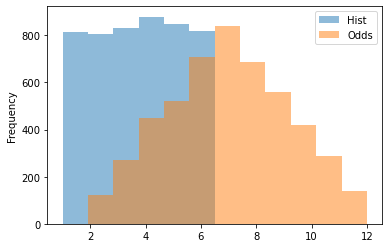

In [224]:
# Alpha decreases the opacity in the chart
ax = df_dice.plot.hist(bins=12, alpha=0.5)

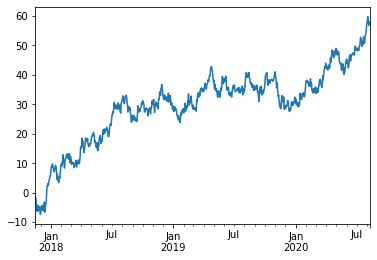

In [226]:
# Basic plot using 1000 random values that create cumulative sums
# over an increasing date range
ser_5 = pd.Series(np.random.randn(1000),
                  index=pd.date_range('11/15/2017', periods=1000))
ser_5 = ser_5.cumsum()
ser_5.plot()

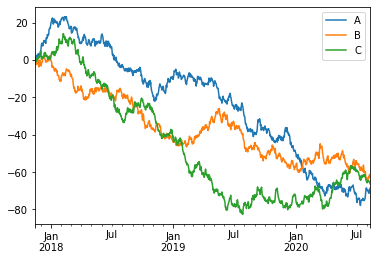

In [227]:
# Display 3 random plots
df_15 = pd.DataFrame(np.random.randn(1000, 3),
                     index=pd.date_range('11/15/2017', periods=1000),
                     columns=list('ABC'))
df_15 = df_15.cumsum()
df_15.plot()

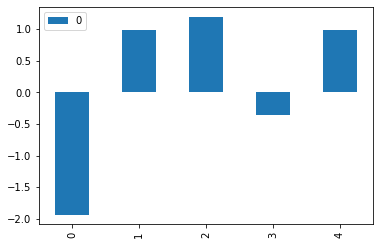

In [229]:
# Make bar chart from 5 random values
pd.DataFrame(np.random.randn(5)).plot.bar()

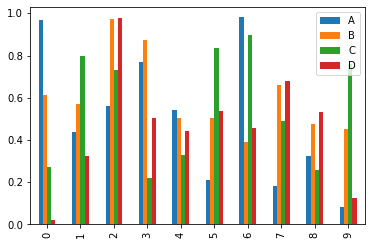

In [228]:
# Make MultiBar Charts
vals = ['A', 'B', 'C', 'D']
df_15 = pd.DataFrame(np.random.rand(10,4), columns=vals)
df_15.plot.bar()

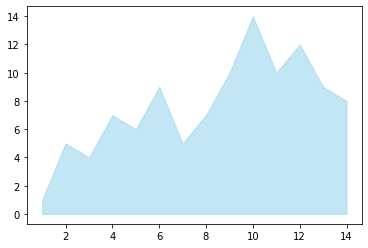

In [230]:
# Area plot 
# Define x range and y values
x_rng = range(1,15)
y_vals = [1,5,4,7,6,9,5,7,10,14,10,12,9,8]
# Change fill color and opacity
plt.fill_between(x_rng, y_vals, color="skyblue", alpha=0.5)
plt.show()

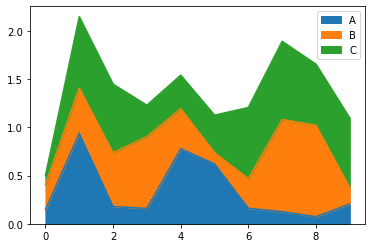

In [231]:
# Area plot with multiple areas
pd.DataFrame(np.random.rand(10,3), columns=['A','B','C']).plot.area()

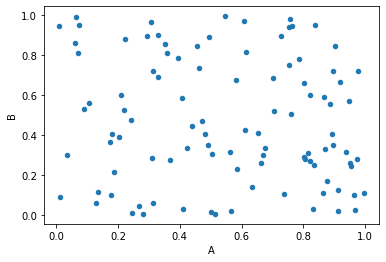

In [232]:
# Create a scatterplot with 100 random values
pd.DataFrame(np.random.rand(100,2), 
             columns=['A','B']).plot.scatter(x='A', y='B')

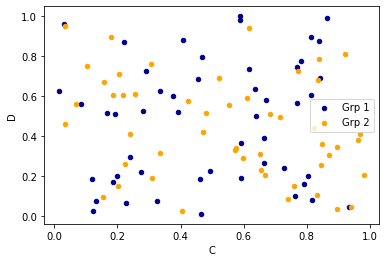

In [233]:
# Multiple column scatter plots
df_15 = pd.DataFrame(np.random.rand(50,4), columns=['A','B','C','D'])
ax = df_15.plot.scatter(x='A', y='B', color='DarkBlue', label='Grp 1')
df_15.plot.scatter(x='C', y='D', color='Orange', label='Grp 2', ax=ax)

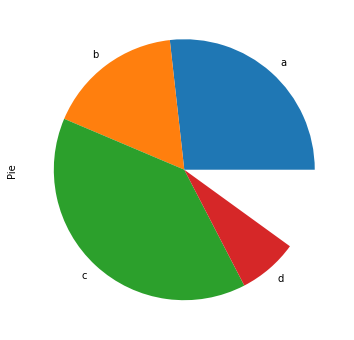

In [234]:
# Pie Charts with 4 random values
pd.Series(np.random.rand(4),
          index=['a','b','c','d'], 
          name='Pie').plot.pie(figsize=(6,6))